* This file provides examples for the traning process of different neural networks. <p>
And we use FDNN to help you understand the training process.


In [1]:
import numpy as np
import pandas as pd 
import torch
from torch.autograd import Variable
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#FDNN
input_size = 32
hidden_size = 10
output_size = 4
batch_size = 2
neu = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
)
cost = torch.nn.MSELoss()
optimizer = torch.optim.Adam(neu.parameters(),lr = 0.01)

In [10]:
#RNN 
input_size = 4
hidden_size = 4
output_size = 4
batch_size = 2
neu = torch.nn.RNN(input_size,output_size,num_layers=10)

In [9]:
#LSTM
input_size = 4
hidden_size = 4
output_size = 4
batch_size = 2
neu = torch.nn.LSTM(input_size,output_size,num_layers=10)

In [8]:
#GRU
input_size = 4
hidden_size = 4
output_size = 4
batch_size = 2
neu = torch.nn.GRU(input_size,output_size,num_layers=10)

In [7]:
#CNN
class CNNnet(torch.nn.Module):
    def __init__(self):
        super(CNNnet,self).__init__()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=4,
                            out_channels=4,
                            kernel_size=1,
                            stride=2,
                            padding=1),
            torch.nn.Sigmoid(),
            #torch.nn.MaxPool1d(kernel_size=1)
        )

        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=4,
                            out_channels=4,
                            kernel_size=1,
                            stride=2,
                            padding=1),
            torch.nn.Sigmoid(),
            #torch.nn.MaxPool1d(kernel_size=1)
        )

        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=4,
                            out_channels=4,
                            kernel_size=1,
                            stride=2,
                            padding=1),
            torch.nn.Sigmoid(),
            #torch.nn.MaxPool1d(kernel_size=1)
        )
        
        self.mlp1 = torch.nn.Sequential(torch.nn.Linear(2,10),torch.nn.Sigmoid(),torch.nn.Linear(10,2))
       
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        print('conv',x)
        x = self.mlp1(x)
        return x
model = CNNnet()

In [3]:
X=[]
def int2bin(n, count=32):
    """returns the binary of integer n, using count number of digits"""
    return "".join([str((n >> y) & 1) for y in range(count-1, -1, -1)])


print(int2bin(1))
for i in range(0,8):
    q=[]
    x=int2bin(i)
    print(len(x))
    for j in x:
        q.append(int(j))
    X.append(q)
print(X)

00000000000000000000000000000001
32
32
32
32
32
32
32
32
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]]


In [4]:
Y=[[1, 2, 2, 2], [0, 0, 3, 4], [1, 1, 1, 2], [0, 0, 0, 5], [0, 1, 2, 6], [1, 2, 2, 2], [0, 2, 2, 7], 
[0, 0, 2, 3]]
mm=MinMaxScaler()
Y=mm.fit_transform(Y)

In [5]:
losses = []
for i in range(2000):
    batch_loss = []
    for start in range(0, len(X), batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = torch.FloatTensor(X[start:end])
        yy = torch.FloatTensor(Y[start:end])
        predict = neu(xx)
        loss = cost(predict,yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))
losses

0 0.3114802
100 0.070552446
200 0.012759045
300 0.0054387995
400 0.0010411099
500 0.00012600125
600 3.9036368e-05
700 1.49983125e-05
800 5.622323e-06
900 1.8776914e-06
1000 5.399986e-07
1100 1.3725521e-07
1200 0.002451268
1300 9.658247e-09
1400 5.112619e-07
1500 1.3867634e-09
1600 6.8675035e-09
1700 9.15333e-05
1800 1.3986191e-09
1900 3.2219925e-09


[0.3114802,
 0.070552446,
 0.012759045,
 0.0054387995,
 0.0010411099,
 0.00012600125,
 3.9036368e-05,
 1.49983125e-05,
 5.622323e-06,
 1.8776914e-06,
 5.399986e-07,
 1.3725521e-07,
 0.002451268,
 9.658247e-09,
 5.112619e-07,
 1.3867634e-09,
 6.8675035e-09,
 9.15333e-05,
 1.3986191e-09,
 3.2219925e-09]

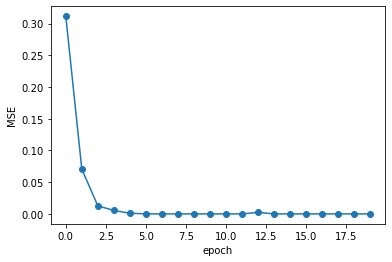

In [6]:
plt.plot(np.arange(len(losses)),losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.savefig('error.svg')
plt.show()